# Reconocimiento de Aves

## Dependencias

## Instalacion

In [315]:
!pip install tensorflow

## Importacion

In [316]:
import sys
import os
import tensorflow as tf

print(tf.__version__)

2.8.0


Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os

import zipfile
zip = zipfile.ZipFile("/content/drive/My Drive/birds-dataset.zip", "r")
zip.extractall()
zip.close()

os.listdir()

['.config',
 'train',
 'images to test',
 'drive',
 'class_dict.csv',
 'birds.csv',
 'test',
 'birds latin names.csv',
 'valid',
 'models',
 'sample_data']

In [ ]:
train_data_path = './train'
valid_data_path = './valid'

## Parametros

In [278]:
epochs=30
width, height = 180, 180
batch_size = 32
pasos = int(674/batch_size)
validation_steps = 100
num_classes = 5
lr = 0.0004

## Preparacion de imagenes

In [279]:
training_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

training_set = training_data_generator.flow_from_directory(
    train_data_path,
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_set = validation_data_generator.flow_from_directory(
    valid_data_path,
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 674 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [280]:
import matplotlib.pyplot as plt

def show_image(filepath, target_size=None) :
  image = tf.keras.preprocessing.image.load_img(filepath, target_size=target_size)
  plt.imshow(image)
  plt.show()

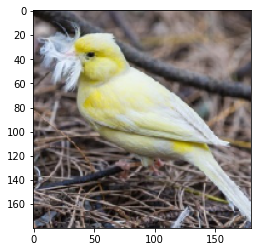

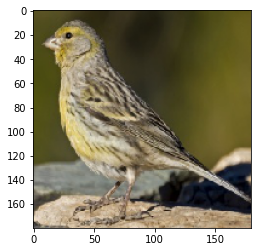

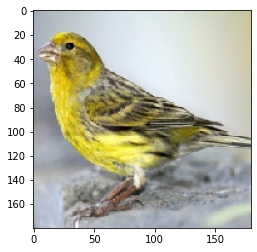

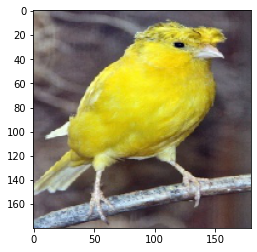

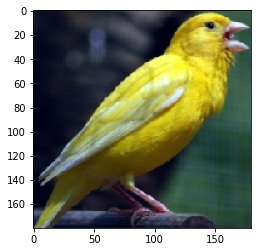

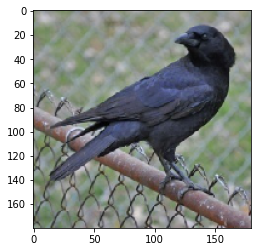

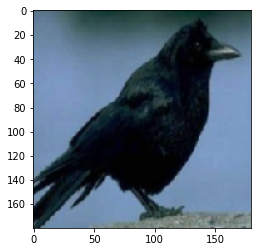

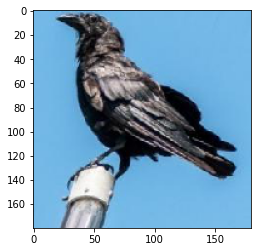

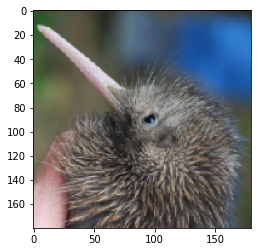

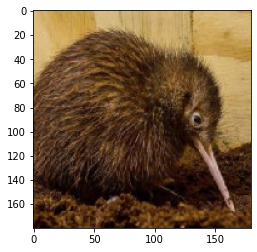

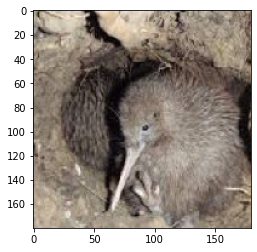

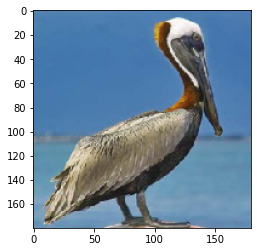

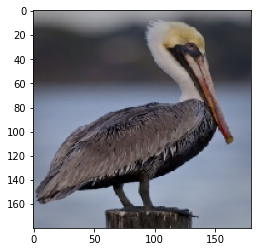

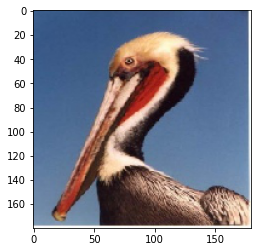

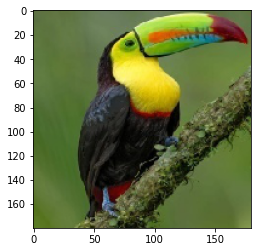

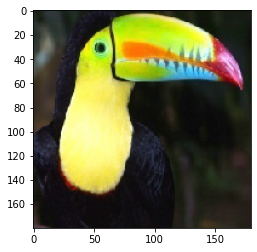

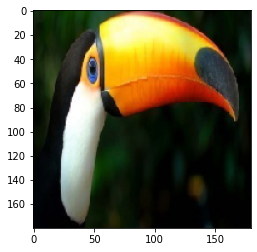

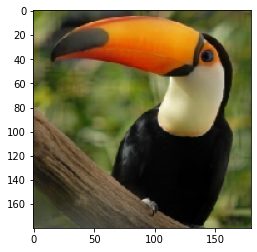

In [281]:
for i in range(len(training_set.filepaths)) :
  if i % 39 == 0:
    show_image(training_set.filepaths[i], (width, height))

## Modelo

In [302]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Convolution2D(32, (3, 3), padding ="same", input_shape=(width, height, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Convolution2D(64, (2, 2), padding ="same"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy'])
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy'])

In [303]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 90, 90, 64)        8256      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 129600)            0         
                                                                 
 dense_41 (Dense)            (None, 256)             

## Entrenamiento

In [304]:
history = model.fit(
    training_set,
    steps_per_epoch=pasos,
    epochs=epochs,
    validation_data=validation_set,
    validation_steps=validation_steps
)

Epoch 1/30
21/21 [==============================] - 7s 316ms/step - loss: 2.6064 - accuracy: 0.3832 - val_loss: 0.7064 - val_accuracy: 0.7600
Epoch 2/30
21/21 [==============================] - 6s 299ms/step - loss: 0.9337 - accuracy: 0.6402
Epoch 3/30
21/21 [==============================] - 7s 308ms/step - loss: 0.7249 - accuracy: 0.7262
Epoch 4/30
21/21 [==============================] - 6s 296ms/step - loss: 0.5371 - accuracy: 0.8162
Epoch 5/30
21/21 [==============================] - 6s 298ms/step - loss: 0.4971 - accuracy: 0.8302
Epoch 6/30
21/21 [==============================] - 6s 299ms/step - loss: 0.4166 - accuracy: 0.8505
Epoch 7/30
21/21 [==============================] - 6s 296ms/step - loss: 0.4503 - accuracy: 0.8536
Epoch 8/30
21/21 [==============================] - 6s 290ms/step - loss: 0.4394 - accuracy: 0.8520
Epoch 9/30
21/21 [==============================] - 6s 291ms/step - loss: 0.3550 - accuracy: 0.8738
Epoch 10/30
21/21 [==============================] - 6s 29

## Metricas

In [305]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

print("acc: ", acc)
print("val_acc: ", val_acc)
print("loss: ", loss)
print("val_loss: ", val_loss)

acc:  [0.38317757844924927, 0.6401869058609009, 0.726190447807312, 0.8161993622779846, 0.8302180767059326, 0.8504672646522522, 0.8535825610160828, 0.8520249128341675, 0.8738317489624023, 0.9158878326416016, 0.9065420627593994, 0.9174454808235168, 0.8753893971443176, 0.9252336621284485, 0.895638644695282, 0.9127725958824158, 0.9299065470695496, 0.9485981464385986, 0.9595015645027161, 0.9657320976257324, 0.9704049825668335, 0.9657320976257324, 0.9657320976257324, 0.9735202789306641, 0.961309552192688, 0.9828660488128662, 0.9766355156898499, 0.9766355156898499, 0.9766355156898499, 0.9781931638717651]
val_acc:  [0.7599999904632568]
loss:  [2.60644793510437, 0.9336881637573242, 0.724897027015686, 0.5370848178863525, 0.4970807135105133, 0.4166427552700043, 0.4503372609615326, 0.4393612742424011, 0.3549765646457672, 0.27945226430892944, 0.2913985252380371, 0.26031702756881714, 0.33238527178764343, 0.2196279764175415, 0.2968140244483948, 0.25893357396125793, 0.21643708646297455, 0.162914127111

## Guardar modelo

In [306]:
from datetime import datetime

target_dir = './models/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)

now = datetime.now()
timestamp = ''.join(str(datetime.timestamp(now)).split('.'))

model.save('./models/model-'+ timestamp +'.h5')
model.save_weights('./models/weight-'+ timestamp +'.h5')

## Predecir

In [307]:
import numpy as np

model = '/content/models/model-164920282192051.h5'
weight_model = '/content/models/weight-164920282192051.h5'
load_model = tf.keras.models.load_model(model)
load_model.load_weights(weight_model)

In [308]:
def predict(file):
  test_image = tf.keras.preprocessing.image.load_img(file, target_size=(width, height))
  test_image = tf.keras.preprocessing.image.img_to_array(test_image)
  print(test_image.shape)
  test_image = np.expand_dims(test_image, axis=0)
  print(test_image.shape)
  prediction = load_model.predict(test_image)
  result = prediction[0]
  index = np.argmax(result)
  if index == 0:
    print("CANARY")
  elif index == 1:
    print("CROW")
  elif index == 2:
    print("KIWI")
  elif index == 3:
    print("PELICAN")
  elif index == 4:
    print("TOUCHAN")
  return result

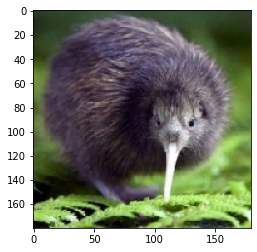

(180, 180, 3)
(1, 180, 180, 3)
KIWI


array([0., 0., 1., 0., 0.], dtype=float32)

In [314]:
image_to_predict = '/content/test/KIWI/3.jpg'
show_image(image_to_predict, target_size=(width, height))

predict(image_to_predict)